# Get data cube values at given locations

Get the value from all data cube dimensions at the species occurrence location.
-------
v0.1: First version, Maria Ricci 

In [2]:
import xarray as xr
import rioxarray as rxr
from glob import glob
import re

In [6]:
# load cube
import re

pattern = r'\\|\.' # to get the name of the layer from the filename

path = "N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f02_raster_10m_collection/*.tif"
layers = glob(path)
da_dict = {}
for layer in layers:
    name = re.split(pattern, layer)[-2]
    # print(layer)
    print(name)
    da = rxr.open_rasterio(filename=layer, default_name=name) # type: ignore
    da_dict[name] = da
da_dict


admin_commune_2024_10m_b1
admin_quartiers_2024_10m_b1
cadaster_vdl_public_private_layer_2024_10m_b1
dem_2019_10m_b1
dem_aspect_2019_10m_b1
dem_slope_2019_10m_b1
dem_surface_model_2019_10m_b1
flood_map_2021_10m_b1
hrl_treecover_2018_10m_b1
land_cover_2018_2021_10m_b2
land_use_07_15_18_21_10m_b4
protected_areas_v21_2023_10m_b1
public_forests_2024_10m_b1
soil_map_100000_2024_10m_b1
soil_map_25000_2024_10m_b1
traffic_intensity_2024_10m_b1


{'admin_commune_2024_10m_b1': <xarray.DataArray 'admin_commune_2024_10m_b1' (band: 1, y: 1044, x: 972)>
 [1014768 values with dtype=uint8]
 Coordinates:
   * band         (band) int32 1
   * x            (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
   * y            (y) float64 8.002e+04 8.002e+04 8e+04 ... 6.96e+04 6.96e+04
     spatial_ref  int32 0
 Attributes:
     AREA_OR_POINT:  Area
     _FillValue:     0
     scale_factor:   1.0
     add_offset:     0.0,
 'admin_quartiers_2024_10m_b1': <xarray.DataArray 'admin_quartiers_2024_10m_b1' (band: 1, y: 1044, x: 972)>
 [1014768 values with dtype=int32]
 Coordinates:
   * band         (band) int32 1
   * x            (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
   * y            (y) float64 8.002e+04 8.002e+04 8e+04 ... 6.96e+04 6.96e+04
     spatial_ref  int32 0
 Attributes:
     AREA_OR_POINT:  Area
     _FillValue:     0
     scale_factor:   1.0
     add_offset:     0.0,
 'cadaster_vdl_public_private_layer_2024_1

In [7]:
ds = xr.Dataset(da_dict)

In [8]:
ds

<xarray.Dataset>
Dimensions:                                        (band: 4, x: 972, y: 1044)
Coordinates:
  * band                                           (band) int32 1 2 3 4
  * x                                              (x) float64 7.286e+04 ... ...
  * y                                              (y) float64 8.002e+04 ... ...
    spatial_ref                                    int32 0
Data variables: (12/16)
    admin_commune_2024_10m_b1                      (band, y, x) float64 0.0 ....
    admin_quartiers_2024_10m_b1                    (band, y, x) float64 0.0 ....
    cadaster_vdl_public_private_layer_2024_10m_b1  (band, y, x) float64 1.0 ....
    dem_2019_10m_b1                                (band, y, x) float32 327.0...
    dem_aspect_2019_10m_b1                         (band, y, x) float32 180.0...
    dem_slope_2019_10m_b1                          (band, y, x) float32 5.711...
    ...                                             ...
    land_use_07_15_18_21_10m_b4                    (band, y, x) int16 ...
    protected_areas_v21_2023_10m_b1                (band, y, x) float64 0.0 ....
    public_forests_2024_10m_b1                     (band, y, x) float64 1.0 ....
    soil_map_100000_2024_10m_b1                    (band, y, x) float64 0.0 ....
    soil_map_25000_2024_10m_b1                     (band, y, x) float64 121.0...
    traffic_intensity_2024_10m_b1                  (band, y, x) float32 -9.99...

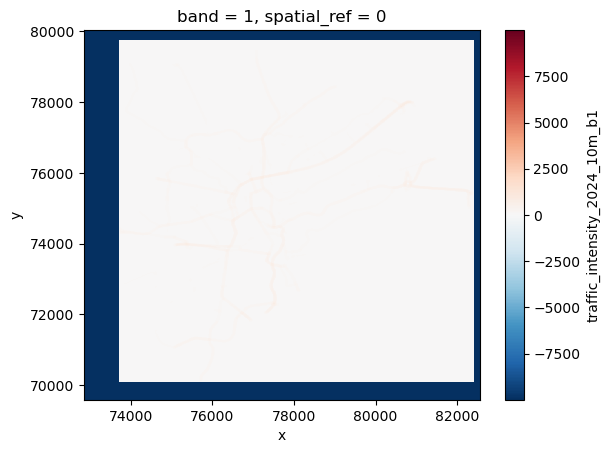

In [20]:
ds.traffic_intensity_2024_10m_b1.sel(band=1).plot()

In [12]:
# load point data
import pandas as pd


In [10]:
%load_ext sql

In [11]:
%sql --section fairicube

Connecting to 'fairicube'

In [28]:
%sqlcmd tables --schema luxembourg_species

Name
neophytes_list
neophytes_geometry_raw
neophytes_geometry_description
luxembourg_species_description
neophytes_geometry
all_species
neophytes_list_gbif
all_species_neophytes


In [36]:
%sqlcmd columns --table neophytes_geometry --schema luxembourg_species

name,type,nullable,default,autoincrement,comment
gbif_key,BIGINT,True,None,False,None
species,TEXT,True,None,False,None
family,TEXT,True,None,False,None
species_name,TEXT,True,None,False,None
species_name_lower,TEXT,True,None,False,None
observation_key,TEXT,True,None,False,None
date_start,DATE,True,None,False,None
date_end,DATE,True,None,False,None
sample_date,DATE,True,None,False,None
taxon_kingdom,TEXT,True,None,False,None


In [31]:
df = %sql SELECT gbif_key, species, sample_date, x_epsg2169, y_epsg2169, gridnum2169_100m_x, gridnum2169_10m FROM luxembourg_species.neophytes_geometry
#WHERE sample_date IS NOT NULL
df = df.DataFrame()
# df['sample_year'] = df['sample_date'].apply(lambda x: x.year)

Running query in 'fairicube'

RuntimeError: (psycopg2.errors.UndefinedColumn) column "gridnum2169_10m" does not exist
LINE 1: ...date, x_epsg2169, y_epsg2169, gridnum2169_100m_x, gridnum216...
                                                             ^
HINT:  Perhaps you meant to reference the column "neophytes_geometry.gridnum2169_100m" or the column "neophytes_geometry.gridnum2169_1km".

[SQL: SELECT gbif_key, species, sample_date, x_epsg2169, y_epsg2169, gridnum2169_100m_x, gridnum2169_10m FROM luxembourg_species.neophytes_geometry]
(Background on this error at: https://sqlalche.me/e/20/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [ ]:
# query the cube - one point
ds.sel(x = 77432, y = 74940, method='nearest').to_dataframe()

In [17]:
# query data cube -- list of points
x_coords = xr.DataArray(df.x_epsg2169)
y_coords = xr.DataArray(df.y_epsg2169)
subset = ds.sel(band = 1, x = x_coords, y = y_coords, method='nearest').to_dataframe()

In [32]:
df.gridnum2169_100m_x

0       78300
1       78300
2       77400
3       77400
4       78500
        ...  
2899    80900
2900    77600
2901    77600
2902    78900
2903    78900
Name: gridnum2169_100m_x, Length: 2904, dtype: int64

In [25]:
subset.drop_duplicates(subset=['x', 'y'], inplace=True)
subset.drop(columns=['band', 'spatial_ref'], inplace=True)
subset


,x,y,admin_commune_2024_10m_b1,admin_quartiers_2024_10m_b1,cadaster_vdl_public_private_layer_2024_10m_b1,dem_2019_10m_b1,dem_aspect_2019_10m_b1,dem_slope_2019_10m_b1,dem_surface_model_2019_10m_b1,flood_map_2021_10m_b1,hrl_treecover_2018_10m_b1,land_cover_2018_2021_10m_b2,land_use_07_15_18_21_10m_b4,protected_areas_v21_2023_10m_b1,public_forests_2024_10m_b1,soil_map_100000_2024_10m_b1,soil_map_25000_2024_10m_b1,traffic_intensity_2024_10m_b1
dim_0,,,,,,,,,,,,,,,,,,
0,78315.0,73145.0,61.0,4.0,1.0,291.0,296.565033,3.199601,291.081451,0.0,0.0,196.0,612,0.0,-1.0,30.0,143.0,7.964112
2,77465.0,75985.0,75.0,20.0,2.0,270.0,277.431396,30.108191,266.053009,0.0,0.0,97.0,313,0.0,-1.0,30.0,143.0,0.000000
4,78515.0,75525.0,35.0,7.0,2.0,315.0,293.962494,26.217613,332.403015,0.0,66.0,0.0,313,0.0,-1.0,30.0,208.0,0.000000
6,74225.0,74305.0,61.0,17.0,2.0,284.0,180.000000,5.710593,287.870605,0.0,0.0,23.0,111,0.0,-1.0,30.0,143.0,227.683273
7,76775.0,74695.0,61.0,14.0,1.0,270.0,123.690071,15.131807,272.687592,0.0,0.0,0.0,111,0.0,-1.0,30.0,143.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,75995.0,74705.0,61.0,14.0,1.0,286.0,161.565048,2.263636,289.476410,0.0,0.0,0.0,133,0.0,-1.0,30.0,143.0,0.000000
2841,76995.0,79015.0,35.0,1.0,2.0,239.0,360.000000,2.862405,247.454849,0.0,0.0,196.0,113,0.0,-1.0,26.0,8.0,0.000000
2842,77995.0,78015.0,35.0,8.0,2.0,268.0,225.000000,9.039936,269.682648,0.0,0.0,82.0,160,0.0,-1.0,13.0,143.0,4.223669


In [38]:
# compute gridnum 10m columns gridnum2169_10m_y and gridnum2169_10m_x
subset['gridnum2169_10m_x'] = subset.x//10*10
subset['gridnum2169_10m_y'] = subset.y//10*10
# rename table
datacube_extract = subset

In [39]:
# save to database
%sql --persist datacube_extract --no-index

Running query in 'fairicube'

Success! Persisted datacube_extract to the database.